In [986]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [987]:
# training svm model on 'temp_training_dataset' csv file
df = pd.read_csv('../output/training_dataset_with_new_rows.csv')
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100,66.666667,True,False,72.222222,0.816497
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87,50.000000,True,False,83.333333,0.666667
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91,60.000000,False,True,2.941176,0.750000
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94,60.000000,True,True,59.259259,0.750000
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100,66.666667,True,False,82.352941,0.816497
...,...,...,...,...,...,...,...,...,...,...,...,...
616,CHIFENG JILONG GOLD MINING,SHANGHAI AUTOMOTIVE INDUSTRY DEVELOPING,0,37,42,40,40,0.000000,False,False,5.128205,0.000000
617,FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...,TOSHIBA ELEVATOR AND BUILDING SYSTEMS,0,37,41,41,41,9.090909,False,False,2.000000,0.169031
618,POSTFINANCE AG,SERVICIO NACIONAL MIGRACION,0,34,43,29,29,0.000000,False,False,0.000000,0.000000
619,VODACOM PTY,36TH DISTRICT COURT,0,27,38,33,33,0.000000,False,False,0.000000,0.000000


In [988]:
# Convert True/False column to numerical values
df['first word match'] = df['first word match'].astype(int)
df['last word match'] = df['last word match'].astype(int)

In [989]:
# confirming the dimensions of the dataset
print(df.shape)

(621, 12)


In [990]:
df

,Company Name,Similar Name,Target,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity
0,HARRIS COUNTY CSCD,HARRIS COUNTY,1,84,100,84,100,66.666667,1,0,72.222222,0.816497
1,HARRIS COUNTY CSCD,HARRIS COUNTY ITC,1,86,94,74,87,50.000000,1,0,83.333333,0.666667
2,RICHLAND COUNTY EMERGENCY SERVICES,LANDER COUNTY EMERGENCY SERVICES,0,91,97,91,91,60.000000,0,1,2.941176,0.750000
3,CS RECURSOS GEOTERMICO ICE,CS RECURSOS GEOTAARMICO ICE,1,94,92,94,94,60.000000,1,1,59.259259,0.750000
4,HARRIS COUNTY ITC,HARRIS COUNTY,1,90,100,87,100,66.666667,1,0,82.352941,0.816497
...,...,...,...,...,...,...,...,...,...,...,...,...
616,CHIFENG JILONG GOLD MINING,SHANGHAI AUTOMOTIVE INDUSTRY DEVELOPING,0,37,42,40,40,0.000000,0,0,5.128205,0.000000
617,FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...,TOSHIBA ELEVATOR AND BUILDING SYSTEMS,0,37,41,41,41,9.090909,0,0,2.000000,0.169031
618,POSTFINANCE AG,SERVICIO NACIONAL MIGRACION,0,34,43,29,29,0.000000,0,0,0.000000,0.000000
619,VODACOM PTY,36TH DISTRICT COURT,0,27,38,33,33,0.000000,0,0,0.000000,0.000000


In [991]:
# Let’s also look at the data types of each attribute
print(df.dtypes)

Company Name                      object
Similar Name                      object
Target                            object
Simple Ratio                       int64
partial Ratio                      int64
Token Sort Ratio                   int64
Token Set Ratio                    int64
word match percentage            float64
first word match                   int32
last word match                    int32
character_matching_percentage    float64
cosine similarity                float64
dtype: object


In [992]:
# from sklearn.preprocessing import MinMaxScaler #bring values in range of 0 to 1

# # Initialize the MinMaxScaler
# minmax_scaler = MinMaxScaler()

# columns_to_standardize = ['Simple Ratio','partial Ratio', 'Token Sort Ratio', 'Token Set Ratio','word match percentage', 'first word match', 'last word match',
#     'character_matching_percentage', 'cosine similarity']

# # Fit and transform the standardized data
# df_scaled = pd.DataFrame(minmax_scaler.fit_transform(df), columns=columns_to_standardize)

# # Display the scaled dataframe
# print(df_scaled)

In [993]:
df.describe()

,Simple Ratio,partial Ratio,Token Sort Ratio,Token Set Ratio,word match percentage,first word match,last word match,character_matching_percentage,cosine similarity
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,69.993559,82.611916,69.027375,79.544283,47.877620,0.731079,0.330113,50.680407,0.581946
std,25.886164,22.252998,25.697199,26.496805,33.914266,0.443756,0.470633,33.789069,0.351867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,73.000000,49.000000,67.000000,20.000000,0.000000,0.000000,19.444444,0.377964
50%,76.000000,92.000000,75.000000,92.000000,50.000000,1.000000,0.000000,51.282051,0.670820
75%,93.000000,100.000000,92.000000,100.000000,71.428571,1.000000,1.000000,76.923077,0.833333
max,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,100.000000,1.000000


In [994]:
# class distribution : same:1 , different:0
print(df.groupby('Target').size())
# means we must have same no. of records count in both categories (more balanced model created)
# diff. between same / diff record count must be minimum

Target
0             365
1             244
different      11
same            1
dtype: int64


IndexError: index 4 is out of bounds for axis 0 with size 4

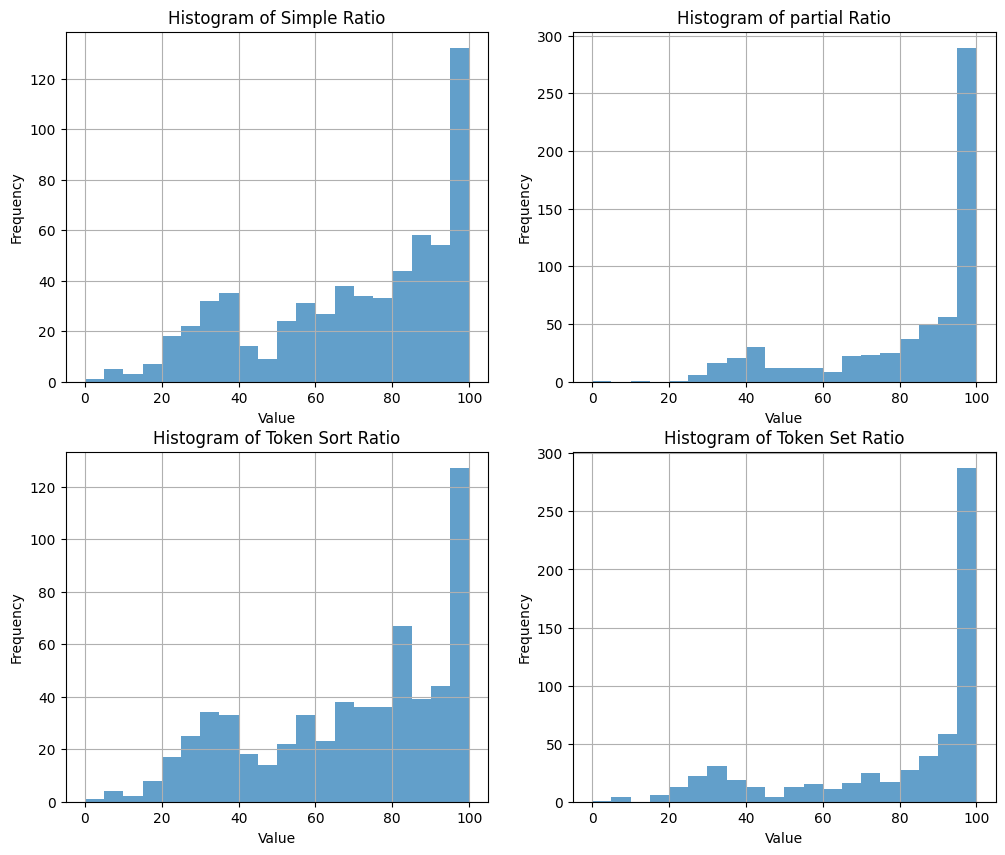

In [995]:
# visualizations of individual attributes
import matplotlib.pyplot as plt

# Assuming 'Simple Ratio', 'Partial Ratio', 'Token Sort Ratio', 'Token Set Ratio' are the columns of interest
ratio_columns = ['Simple Ratio','partial Ratio', 'Token Sort Ratio', 'Token Set Ratio','word match percentage', 'first word match', 'last word match',
    'character_matching_percentage', 'cosine similarity']

# Create separate histogram plots for each ratio column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(ratio_columns):
    axes[i].hist(df[column], bins=20, alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### Observation: Most of records in dataset having values of these ratios ('Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio') as more than 70 till 90....hence it is challenging to recognize those records are matched or No-matched, as 100 value shows exact match but need mpore accuracy for prediction for values lie between 70 to 90.

### Validation of Dataset: 
#### good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [996]:
df.columns

Index(['Company Name', 'Similar Name', 'Target', 'Simple Ratio',
       'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio',
       'word match percentage', 'first word match', 'last word match',
       'character_matching_percentage', 'cosine similarity'],
      dtype='object')

In [997]:
rows_with_nan = df[df.isna().any(axis=1)]

print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
Empty DataFrame
Columns: [Company Name, Similar Name, Target, Simple Ratio, partial Ratio, Token Sort Ratio, Token Set Ratio, word match percentage, first word match, last word match, character_matching_percentage, cosine similarity]
Index: []


### Logistic regression: (trying out different combinations of features to increase the accuracy)
1. accuracy=0.664 (9 attributes): 'Simple Ratio','partial Ratio', 'Token Sort Ratio', 'Token Set Ratio','word match percentage', 'first word match', 'last word match','character_matching_percentage', 'cosine similarity'
2. accuracy=0.672 (6 attributes): 'Simple Ratio','first word match', 'Token Sort Ratio', 'Token Set Ratio', 'character_matching_percentage', 'cosine similarity'
3. accuracy=0.696 (8 attributes): 'Simple Ratio', 'Token Sort Ratio', 'Token Set Ratio','word match percentage', 'last word match','character_matching_percentage', 'cosine similarity'
4. accuracy=0.704 (8 attributes): 'Simple Ratio', 'Token Sort Ratio', 'Token Set Ratio','word match percentage', 'first word match', 'last word match','character_matching_percentage', 'cosine similarity'
5. accuracy=0.728 (4 attributes): 'Simple Ratio','partial Ratio', 'Token Sort Ratio', 'Token Set Ratio'
6. accuracy=0.736 (5 attributes): 'Simple Ratio','partial Ratio', 'word match percentage','character_matching_percentage', 'cosine similarity'

7. 
 * accuracy=0.744 (6 attributes): 'Simple Ratio','partial Ratio',  'Token Set Ratio','word match percentage','character_matching_percentage', 'cosine similarity'
 * accuracy=0.752 (7 attributes): 'Simple Ratio','partial Ratio', 'Token Sort Ratio', 'Token Set Ratio','word match percentage', 'character_matching_percentage', 'cosine similarity'
 * accuracy=0.752 (5 attributes): 'Simple Ratio','partial Ratio', 'Token Set Ratio','word match percentage','character_matching_percentage'
 * accuracy=0.768 (4 attributes):'Simple Ratio','partial Ratio', 'Token Set Ratio','character_matching_percentage'
 


In [998]:
# Applying minmax Standization on numerical columns (Currently increase test accuracy slightly to 76%)
from sklearn.preprocessing import MinMaxScaler

# Extract the relevant columns for standardization
columns_to_standardize = ['Simple Ratio', 'partial Ratio', 'Token Sort Ratio', 'Token Set Ratio',
    'word match percentage', 'first word match', 'last word match',
    'character_matching_percentage', 'cosine similarity']

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit and transform the numeric data to the range [0, 1]
df[columns_to_standardize] = minmax_scaler.fit_transform(df[columns_to_standardize])

# Display the scaled dataframe
print(df)


                                          Company Name  \
0                                   HARRIS COUNTY CSCD   
1                                   HARRIS COUNTY CSCD   
2                   RICHLAND COUNTY EMERGENCY SERVICES   
3                           CS RECURSOS GEOTERMICO ICE   
4                                    HARRIS COUNTY ITC   
..                                                 ...   
616                         CHIFENG JILONG GOLD MINING   
617  FEDERAL AUTHORITY FOR IDENTITY AND CITIZENSHIP...   
618                                     POSTFINANCE AG   
619                                        VODACOM PTY   
620                     KING ABDULLA MEDICAL CITY KAMC   

                                Similar Name Target  Simple Ratio  \
0                              HARRIS COUNTY      1          0.84   
1                          HARRIS COUNTY ITC      1          0.86   
2           LANDER COUNTY EMERGENCY SERVICES      0          0.91   
3                CS RECURSO

In [999]:
# for training model, we need to split the dataframe and also its features
from sklearn.model_selection import train_test_split
# Separate features and target variable
features = [ 'Simple Ratio','partial Ratio', 'Token Set Ratio', 'character_matching_percentage']
xn = df[features] #independent features (input columns)
yn = df['Target'] #dependent feature (output column)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(xn, yn, test_size=0.2, random_state=42)

In [1000]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report
 
classifier= LogisticRegression(random_state=0)  
classifier.fit(Xn_train, yn_train)  

# Make predictions
yn_pred = classifier.predict(Xn_test)

# Evaluate the model
accuracy = accuracy_score(yn_test, yn_pred)
report = classification_report(yn_test, yn_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.752
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77        71
           1       0.69      0.82      0.75        51
  different        0.00      0.00      0.00         3

    accuracy                           0.75       125
   macro avg       0.50      0.52      0.51       125
weighted avg       0.74      0.75      0.74       125



####
"Improving Logistic Regression: Finding the Best Settings for Better Accuracy"

This code block aims to enhance a Logistic Regression model's accuracy by searching for the optimal hyperparameters. Key parameters like regularization strength, penalty type, and optimization algorithm are fine-tuned. The resulting model is evaluated using metrics such as accuracy and a detailed classification report to gauge its improved predictive performance.

In [1001]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Create a Logistic Regression model
classifier = LogisticRegression(random_state=0)

# Define a parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Regularization type
    'solver': ['liblinear', 'lbfgs']       # Optimization algorithm
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(Xn_train, yn_train)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions
yn_pred = best_classifier.predict(Xn_test)

# Evaluate the model
accuracy = accuracy_score(yn_test, yn_pred)
report = classification_report(yn_test, yn_pred)

# Display results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:\n", report)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy: 0.7017171717171717
Test Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78        71
           1       0.69      0.84      0.76        51
  different        0.00      0.00      0.00         3

    accuracy                           0.76       125
   macro avg       0.51      0.53      0.51       125
weighted avg       0.75      0.76      0.75       125

